In [1]:
# import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
## import data
os.chdir("/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/Data.nosync/")
ECCO2 = xr.open_dataset('ECCO2_weekly.nc')


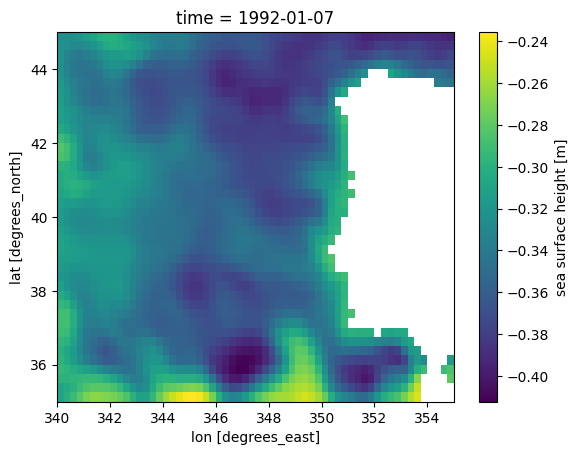

In [272]:
ECCO2.SSH.isel(time = 0).plot()

In [244]:
# rename lat, lon and time to your names

DS = ECCO2
DS_var = ECCO2.SSH # choose one variable from your dataset e.g. temperature

lats_len = DS.lat.shape[0]
lons_len = DS.lon.shape[0]

mask = np.zeros((lats_len, lons_len), dtype = bool)

for lats in np.arange(0, lats_len):
    for value in DS_var.isel(time = 0, lat = lats).values:
        #print(value)
        if np.isnan(value):
            break
        last_valid = value
    
    mask[lats, :] = (DS_var.isel(time = 0, lat = lats) == last_valid).values
     
DS['mask'] = (('lat', 'lon'), mask)

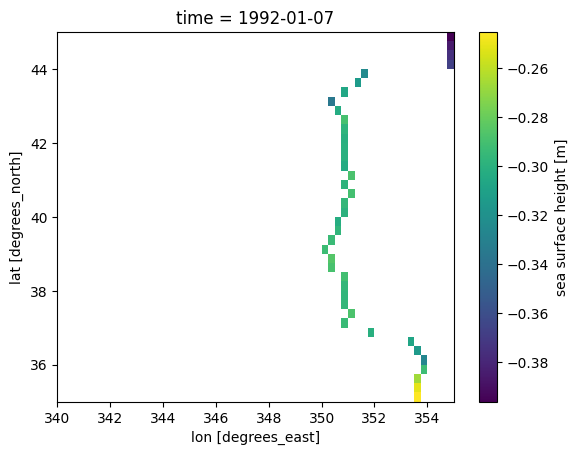

In [252]:
# rename lat, lon and time to your names
DS.SSH.where(DS.mask).isel(time = 0).plot()